In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('../train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [77]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

# Check barplot and distribution for all categorical features

In [78]:
df['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

<Axes: xlabel='GarageQual'>

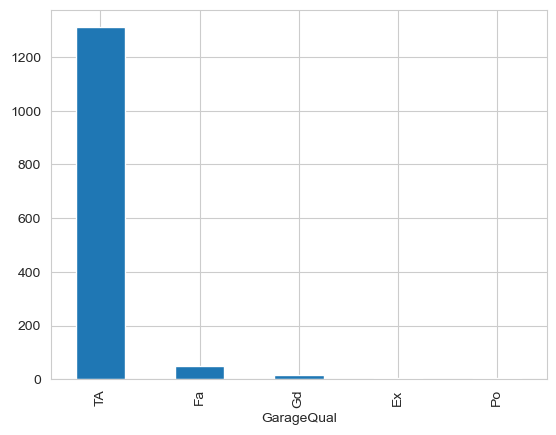

In [79]:
df['GarageQual'].value_counts().plot(kind='bar')

# Compare most frequent value and NA values dehaviour

Text(0.5, 1.0, 'GarageQual')

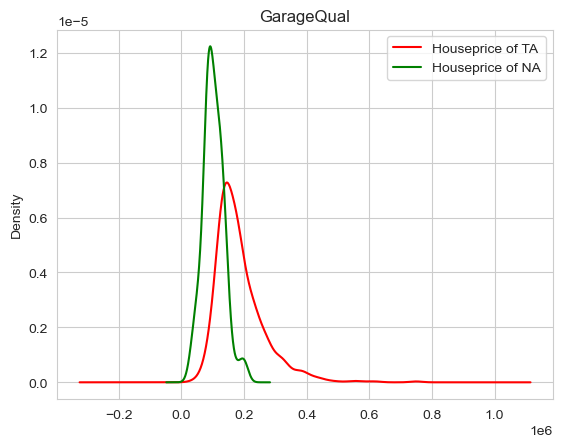

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='green')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houseprice of TA', 'Houseprice of NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

# Fill by mode

<Axes: xlabel='GarageQual_fillMode'>

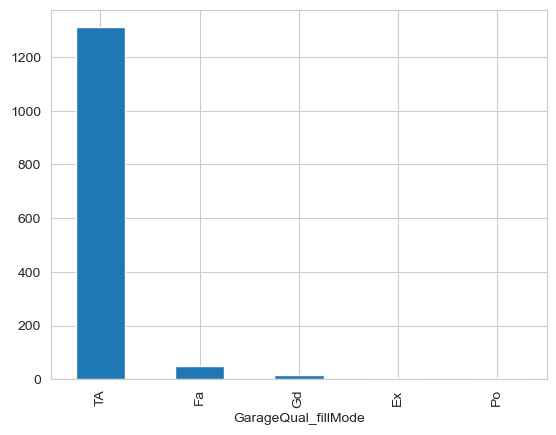

In [81]:
mode = df['GarageQual'].mode()

df['GarageQual_fillMode'] = df['GarageQual'].fillna(mode)
df['GarageQual_fillMode'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

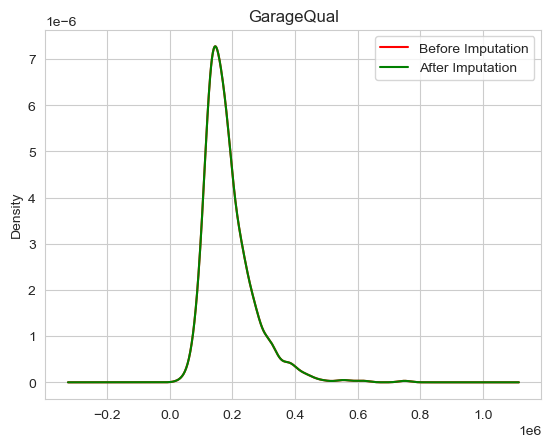

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')
df[df['GarageQual_fillMode'] == 'TA']['SalePrice'].plot(kind='kde',ax=ax,color='green')

lines, labels = ax.get_legend_handles_labels()
labels = ['Before Imputation', 'After Imputation']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [83]:
# Check barplot and distribution for all categorical features
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

<Axes: xlabel='FireplaceQu'>

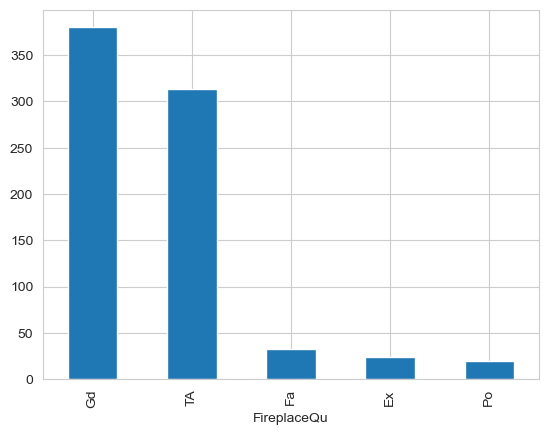

In [84]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

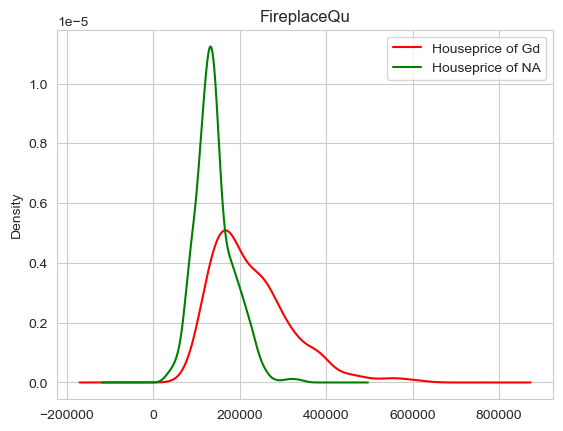

In [85]:
# Compare most frequent value and NA values dehaviour
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houseprice of Gd', 'Houseprice of NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

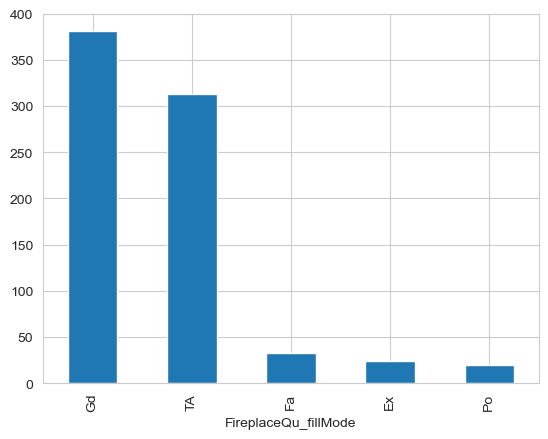

<Figure size 640x480 with 0 Axes>

In [86]:
# Fill by mode

mode = df['FireplaceQu'].mode()

df['FireplaceQu_fillMode'] = df['FireplaceQu'].fillna(mode)
df['FireplaceQu_fillMode'].value_counts().plot(kind='bar')
fig = plt.figure()

Text(0.5, 1.0, 'FireplaceQu')

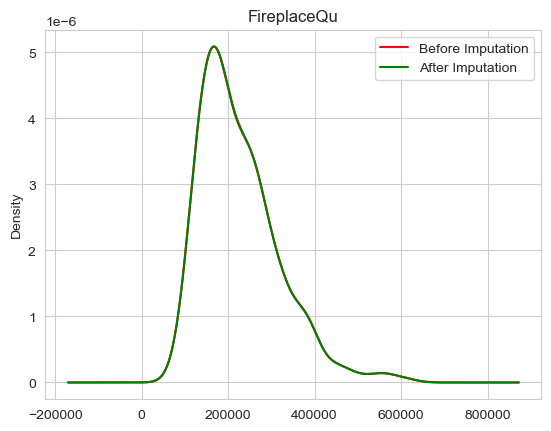

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')
df[df['FireplaceQu_fillMode'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
labels = ['Before Imputation', 'After Imputation']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')


# Sklearn

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [89]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent')

In [90]:
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

In [92]:
pd.DataFrame(X_train).isnull().mean()*100

0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64

In [93]:
pd.DataFrame(X_test).isnull().mean()*100

0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64